In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

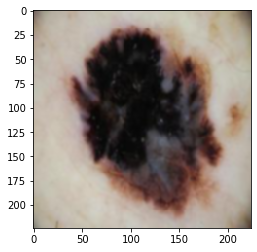

In [2]:
original_image = cv2.imread("C:/Users/LENOVO/Documents/Work/Skin cancer/skin cancer dataset/test/malignant/190.jpg")
averaging_kernel = np.ones((3,3),np.float32)/9 
original_image=cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
gaussian_kernel_y = cv2.getGaussianKernel(5,1) 

gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 

filtered_image = cv2.filter2D(original_image,-1,gaussian_kernel) 
plt.imshow(filtered_image)

In [3]:
img=original_image
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [6]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

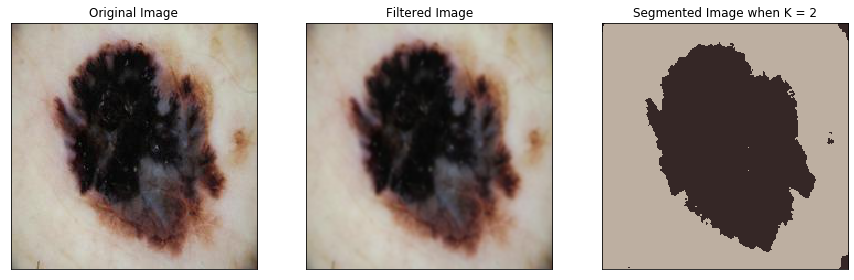

In [7]:
figure_size = 15
original_image=cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(filtered_image)
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

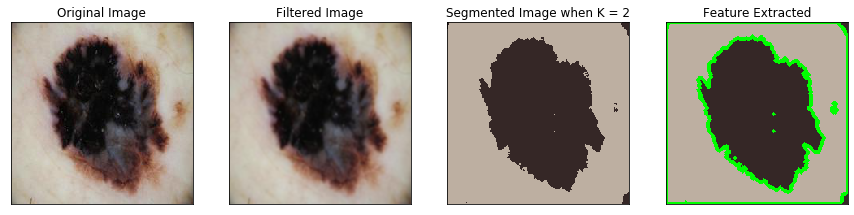

In [8]:
#plt.imshow(with_contours)

plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,4,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2),plt.imshow(filtered_image)
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,4,3),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])

gray_image = cv2.cvtColor(result_image,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(gray_image,127,255,0) 
#calculate the contours from binary image
_, contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
with_contours = cv2.drawContours(result_image,contours,-1,(0,255,0),3) 

plt.subplot(1,4,4),plt.imshow(with_contours)
plt.title('Feature Extracted'), plt.xticks([]), plt.yticks([])

plt.show()

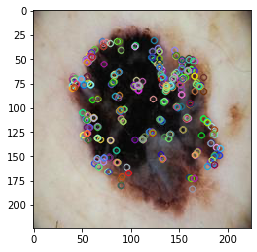

In [9]:
orb = cv2.ORB_create(nfeatures=1500)
keypoints_orb, descriptors = orb.detectAndCompute(img, None)
imgp = cv2.drawKeypoints(img, keypoints_orb, None)
plt.imshow(imgp)

In [10]:
orb = cv2.ORB_create(nfeatures=1500)
keypoints_orb, descriptors = orb.detectAndCompute(img, None)
imgp = cv2.drawKeypoints(img, keypoints_orb, None)
ret,thresh = cv2.threshold(gray_image,127,255,0)
thresh=255-thresh
# plt.imshow(thresh)

# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



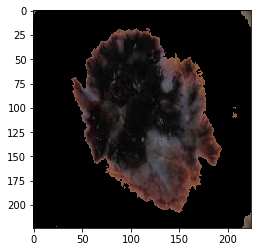

In [11]:
pro=cv2.bitwise_and(img,img,mask = thresh)
pro=cv2.cvtColor(pro, cv2.COLOR_BGR2RGB)
# plt.imshow(pro)

pro=cv2.cvtColor(pro, cv2.COLOR_BGR2RGB)
plt.imshow(pro)


In [37]:
cv2.imshow('pro',pro)

In [25]:
def preprocessing(original_image):
  averaging_kernel = np.ones((3,3),np.float32)/9 
  original_image=cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
  gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
  gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
  gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
  filtered_image = cv2.filter2D(original_image,-1,gaussian_kernel) 

 
  img=original_image
  vectorized = img.reshape((-1,3))
  vectorized = np.float32(vectorized)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))

  gray_image = cv2.cvtColor(result_image,cv2.COLOR_BGR2GRAY) 
  ret,thresh = cv2.threshold(gray_image,127,255,0) 
  #calculate the contours from binary image
  _, contours, _  = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
  with_contours = cv2.drawContours(result_image,contours,-1,(0,255,0),3) 

  orb = cv2.ORB_create(nfeatures=1500)
  keypoints_orb, descriptors = orb.detectAndCompute(img, None)
  imgp = cv2.drawKeypoints(img, keypoints_orb, None)
  ret,thresh = cv2.threshold(gray_image,127,255,0)
  thresh=255-thresh

  pro=cv2.bitwise_and(img,img,mask = thresh)
  pro=cv2.cvtColor(pro, cv2.COLOR_BGR2RGB)

  return pro

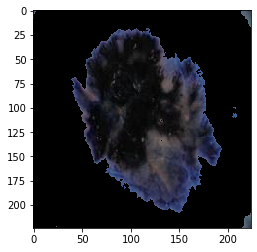

In [26]:
original_image = cv2.imread("C:/Users/LENOVO/Documents/Work/Skin cancer/skin cancer dataset/test/malignant/190.jpg")
new_image = preprocessing(original_image)
plt.imshow(new_image)

In [27]:
cv2.imwrite("C:\\Users\\LENOVO\\Documents\\Work\\Skin cancer\\temp\\testnew_image1.jpg",new_image)

True

In [28]:
import os

In [32]:
processed_image_directory = "C:\\Users\\LENOVO\\Documents\\Work\\Skin cancer\\processed_dataset\\test\\benign\\"
image_directory = "C:\\Users\\LENOVO\\Documents\\Work\\Skin cancer\\skin cancer dataset\\test\\benign\\"
c = 1
for filename in os.listdir(image_directory):
    new_image = preprocessing(cv2.imread(image_directory + filename))
    cv2.imwrite(processed_image_directory + str(c) + "_test_benign.jpg",new_image)
    c+=1
    

In [33]:
processed_image_directory = "C:\\Users\\LENOVO\\Documents\\Work\\Skin cancer\\processed_dataset\\test\\malignant\\"
image_directory = "C:\\Users\\LENOVO\\Documents\\Work\\Skin cancer\\skin cancer dataset\\test\\malignant\\"
c = 1
for filename in os.listdir(image_directory):
    new_image = preprocessing(cv2.imread(image_directory + filename))
    cv2.imwrite(processed_image_directory + str(c) + "_test_malignant.jpg",new_image)
    c+=1

In [34]:
processed_image_directory = "C:\\Users\\LENOVO\\Documents\\Work\\Skin cancer\\processed_dataset\\train\\malignant\\"
image_directory = "C:\\Users\\LENOVO\\Documents\\Work\\Skin cancer\\skin cancer dataset\\train\\malignant\\"
c = 1
for filename in os.listdir(image_directory):
    new_image = preprocessing(cv2.imread(image_directory + filename))
    cv2.imwrite(processed_image_directory + str(c) + "_train_malignant.jpg",new_image)
    c+=1

In [35]:
processed_image_directory = "C:\\Users\\LENOVO\\Documents\\Work\\Skin cancer\\processed_dataset\\train\\benign\\"
image_directory = "C:\\Users\\LENOVO\\Documents\\Work\\Skin cancer\\skin cancer dataset\\train\\benign\\"
c = 1
for filename in os.listdir(image_directory):
    new_image = preprocessing(cv2.imread(image_directory + filename))
    cv2.imwrite(processed_image_directory + str(c) + "_train_benign.jpg",new_image)
    c+=1